In [1]:
import pandas as pd
import sys
import datetime
import matplotlib.pylab as plt
import numpy as np
from math import log

In [2]:
START_DATE = datetime.date(2020,2,24)

In [3]:
def calculate_and_create_chart_for_province(start_date: datetime.date, province: str):
    day = start_date
    cases = {}
    while day<=datetime.date.today():
        day_str = day.strftime("%Y%m%d")
        filename = '../dati-province/dpc-covid19-ita-province-' + day_str + '.csv'
        df = pd.read_csv(filename, encoding = "ISO-8859-1")
        cases[day_str] = int(df[df["denominazione_provincia"]==province]["totale_casi"])
        day = day + datetime.timedelta(days = 1)

    cases_df = pd.DataFrame.from_dict(cases, orient='index')
    cases_df = cases_df.reset_index()
    cases_df = cases_df.rename(columns={"index": "Day", 0: "Cases"})
    
    cases_df_today = cases_df[cases_df["Day"]==datetime.date.today().strftime("%Y%m%d")]["Cases"].sum()
    print("Total cases per 1000 inhabitants up to today:", round(calculate_cases_to_inhabitants_ratio(cases_df_today, province),4))
    calculate_stats(cases_df)

    x = cases_df.index
    y = cases_df["Cases"]
    plt.scatter(x, y)

    z = np.polyfit(x, y, 3)
    p = np.poly1d(z)
    plt.plot(x,p(x),"r--")
    plt.grid()

    plt.show()
    return

In [4]:
def calculate_and_create_chart_for_region(start_date: datetime.date, region: str):
    day = start_date
    cases = {}
    while day<=datetime.date.today():
        day_str = day.strftime("%Y%m%d")
        filename = '../dati-province/dpc-covid19-ita-province-' + day_str + '.csv'
        df = pd.read_csv(filename, encoding = "ISO-8859-1")
        cases[day_str] = int(df[(df["denominazione_regione"]==region)&(df["denominazione_provincia"]!='In fase di definizione/aggiornamento')]["totale_casi"].sum())
        day = day + datetime.timedelta(days = 1)

    cases_df = pd.DataFrame.from_dict(cases, orient='index')
    cases_df = cases_df.reset_index()
    cases_df = cases_df.rename(columns={"index": "Day", 0: "Cases"})
    
    calculate_stats(cases_df)

    x = cases_df.index
    y = cases_df["Cases"]
    plt.scatter(x, y)

    z = np.polyfit(x, y, 3)
    p = np.poly1d(z)
    plt.plot(x,p(x),"r--")
    plt.grid()
    plt.yscale("log")
    plt.show()
    return

In [5]:
def calculate_and_create_chart_for_Italy(start_date: datetime.date):
    day = start_date
    cases = {}
    while day<=datetime.date.today():
        day_str = day.strftime("%Y%m%d")
        filename = '../dati-province/dpc-covid19-ita-province-' + day_str + '.csv'
        df = pd.read_csv(filename, encoding = "ISO-8859-1")
        cases[day_str] = int(df[df["denominazione_provincia"]!='In fase di definizione/aggiornamento']["totale_casi"].sum())
        day = day + datetime.timedelta(days = 1)

    cases_df = pd.DataFrame.from_dict(cases, orient='index')
    cases_df = cases_df.reset_index()
    cases_df = cases_df.rename(columns={"index": "Day", 0: "Cases"})
    
    calculate_stats(cases_df)

    x = cases_df.index
    y = cases_df["Cases"]
    plt.scatter(x, y)

    z = np.polyfit(x, y, 3)
    p = np.poly1d(z)
    plt.plot(x,p(x),"r--")
    plt.grid()

    plt.show()
    return

In [6]:
def calculate_stats(cases_df):
    cases_df_today = cases_df[cases_df["Day"]==datetime.date.today().strftime("%Y%m%d")]["Cases"].sum()
    cases_df_yesterday = cases_df[cases_df["Day"]==(datetime.date.today()- datetime.timedelta(days = 1)).strftime("%Y%m%d")]["Cases"].sum()
    cases_df_five_days_ago = cases_df[cases_df["Day"]==(datetime.date.today()- datetime.timedelta(days = 5)).strftime("%Y%m%d")]["Cases"].sum()
    cases_df_six_days_ago = cases_df[cases_df["Day"]==(datetime.date.today()- datetime.timedelta(days = 6)).strftime("%Y%m%d")]["Cases"].sum()
    print("Total cases up to today:", cases_df_today)
    print("New cases registered today:", cases_df_today-cases_df_yesterday)
    if int(cases_df_yesterday) != 0:
        print("New cases registered today in %:", round((cases_df_today-cases_df_yesterday)/cases_df_yesterday*100,2))

    print("Doubling time in the last five days:", round(calculate_doubling_time_in_the_last_five_days(cases_df_today, cases_df_five_days_ago), 1))
    print("Doubling time yesterday:", round(calculate_doubling_time_in_the_last_five_days(cases_df_yesterday, cases_df_six_days_ago), 1))
    print("Trend of new cases (in %) in the last 5 days:", round((cases_df_today-cases_df_five_days_ago)/cases_df_five_days_ago*100,2))
    
    return

In [7]:
def calculate_doubling_time_in_the_last_five_days(cases_df_today, cases_df_five_days_ago):
    if cases_df_five_days_ago ==0:
        return np.nan
    log_result = log(cases_df_today/cases_df_five_days_ago)
    if log_result != 0:
        return (5*log(2))/(log_result)
    else:
        return np.nan
    

In [8]:
def calculate_cases_to_inhabitants_ratio(cases: int, province: str) -> float:
    df_province: pd.DataFrame = pd.read_csv("../general/province.csv")
    inhabitants = df_province[df_province["Provincia"]==province]["Residenti"].str.replace('.', '', regex=True).sum()
    return int(cases)/int(inhabitants)*1000

# Casi di COVID-19 in Italia - COVID-19 cases in Italy

Total cases up to today: 83497
New cases registered today: 5595
New cases registered today in %: 7.18
Doubling time in the last five days: 9.3
Doubling time yesterday: 8.6
Trend of new cases (in %) in the last 5 days: 45.18


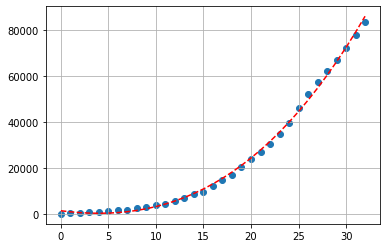

In [9]:
calculate_and_create_chart_for_Italy(START_DATE)

# Casi di COVID-19 in Abruzzo - COVID-19 cases in Abruzzo

Total cases up to today: 1017
New cases registered today: 71
New cases registered today in %: 7.51
Doubling time in the last five days: 6.3
Doubling time yesterday: 6.0
Trend of new cases (in %) in the last 5 days: 73.25


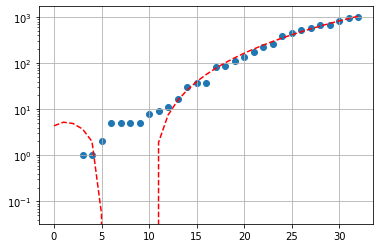

In [10]:
calculate_and_create_chart_for_region(START_DATE, 'Abruzzo')

## Chieti

Total cases per 1000 inhabitants up to today: 0.4857
Total cases up to today: 189
New cases registered today: 14
New cases registered today in %: 8.0
Doubling time in the last five days: 5.6
Doubling time yesterday: 5.3
Trend of new cases (in %) in the last 5 days: 85.29


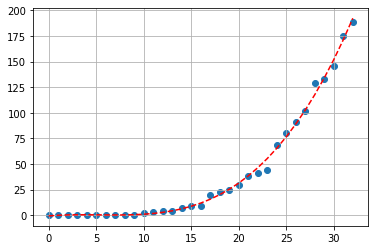

In [11]:
calculate_and_create_chart_for_province(START_DATE, 'Chieti')

## L'Aquila

Total cases per 1000 inhabitants up to today: 0.2484
Total cases up to today: 75
New cases registered today: 11
New cases registered today in %: 17.19
Doubling time in the last five days: 5.1
Doubling time yesterday: 4.8
Trend of new cases (in %) in the last 5 days: 97.37


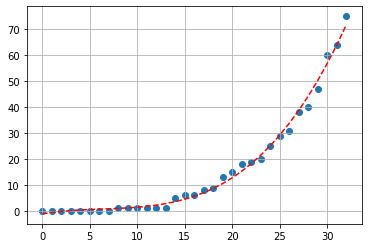

In [12]:
calculate_and_create_chart_for_province(START_DATE, "L'Aquila")

## Pescara

Total cases per 1000 inhabitants up to today: 1.4814
Total cases up to today: 476
New cases registered today: 31
New cases registered today in %: 6.97
Doubling time in the last five days: 9.8
Doubling time yesterday: 8.9
Trend of new cases (in %) in the last 5 days: 42.51


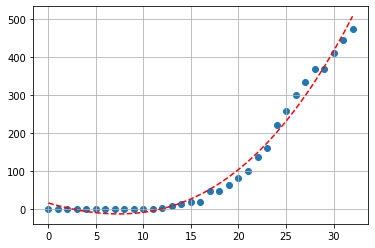

In [13]:
calculate_and_create_chart_for_province(START_DATE, 'Pescara')

## Teramo

Total cases per 1000 inhabitants up to today: 0.894
Total cases up to today: 277
New cases registered today: 15
New cases registered today in %: 5.73
Doubling time in the last five days: 3.9
Doubling time yesterday: 3.8
Trend of new cases (in %) in the last 5 days: 145.13


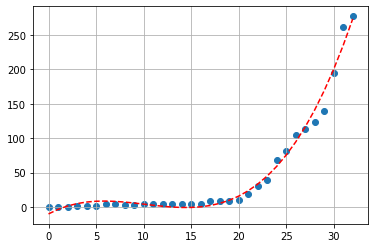

In [14]:
calculate_and_create_chart_for_province(START_DATE, 'Teramo')

# Casi di COVID-19 in Basilicata - COVID-19 cases in Basilicata

Total cases up to today: 151
New cases registered today: 17
New cases registered today in %: 12.69
Doubling time in the last five days: 5.6
Doubling time yesterday: 4.9
Trend of new cases (in %) in the last 5 days: 86.42


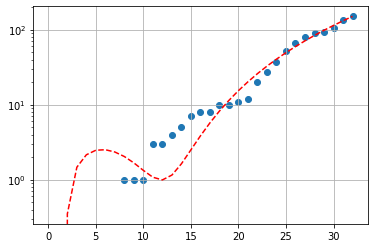

In [15]:
calculate_and_create_chart_for_region(START_DATE, 'Basilicata')

## Matera

Total cases per 1000 inhabitants up to today: 0.2654
Total cases up to today: 53
New cases registered today: 5
New cases registered today in %: 10.42
Doubling time in the last five days: 2.9
Doubling time yesterday: 1.9
Trend of new cases (in %) in the last 5 days: 231.25


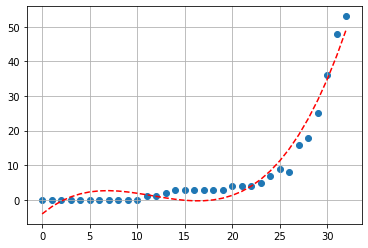

In [16]:
calculate_and_create_chart_for_province(START_DATE, 'Matera')

## Potenza

Total cases per 1000 inhabitants up to today: 0.2644
Total cases up to today: 98
New cases registered today: 12
New cases registered today in %: 13.95
Doubling time in the last five days: 8.4
Doubling time yesterday: 8.8
Trend of new cases (in %) in the last 5 days: 50.77


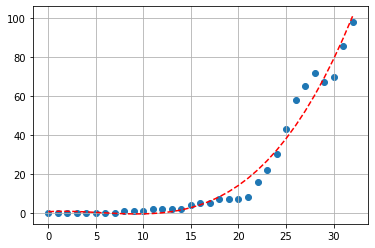

In [17]:
calculate_and_create_chart_for_province(START_DATE, 'Potenza')

# Casi di COVID-19 nella Provincia Autonoma di Bolzano - COVID-19 cases in Autonomous Province of Bolzano

Total cases up to today: 1003
New cases registered today: 97
New cases registered today in %: 10.71
Doubling time in the last five days: 8.9
Doubling time yesterday: 9.2
Trend of new cases (in %) in the last 5 days: 47.94


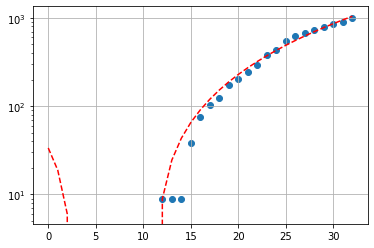

In [18]:
calculate_and_create_chart_for_region(START_DATE, 'P.A. Bolzano')

# Casi di COVID-19 in Calabria - COVID-19 cases in Calabria

Total cases up to today: 492
New cases registered today: 101
New cases registered today in %: 25.83
Doubling time in the last five days: 5.8
Doubling time yesterday: 6.7
Trend of new cases (in %) in the last 5 days: 81.55


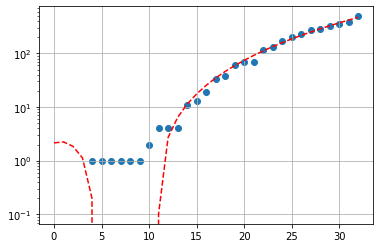

In [19]:
calculate_and_create_chart_for_region(START_DATE, 'Calabria')

## Catanzaro

Total cases per 1000 inhabitants up to today: 0.3174
Total cases up to today: 115
New cases registered today: 62
New cases registered today in %: 116.98
Doubling time in the last five days: 3.7
Doubling time yesterday: 10.4
Trend of new cases (in %) in the last 5 days: 155.56


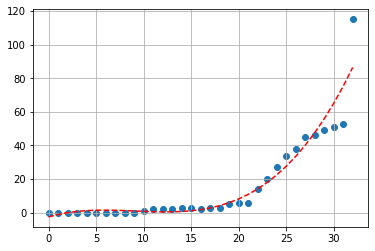

In [20]:
calculate_and_create_chart_for_province(START_DATE, 'Catanzaro')

## Cosenza

Total cases per 1000 inhabitants up to today: 0.1798
Total cases up to today: 128
New cases registered today: 21
New cases registered today in %: 19.63
Doubling time in the last five days: 4.9
Doubling time yesterday: 4.6
Trend of new cases (in %) in the last 5 days: 103.17


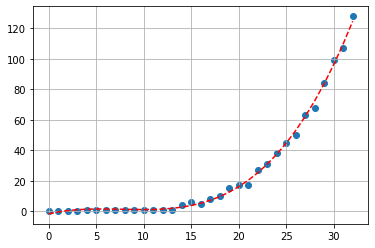

In [21]:
calculate_and_create_chart_for_province(START_DATE, 'Cosenza')

## Crotone

Total cases per 1000 inhabitants up to today: 0.4557
Total cases up to today: 80
New cases registered today: 0
New cases registered today in %: 0.0
Doubling time in the last five days: 12.8
Doubling time yesterday: 7.4
Trend of new cases (in %) in the last 5 days: 31.15


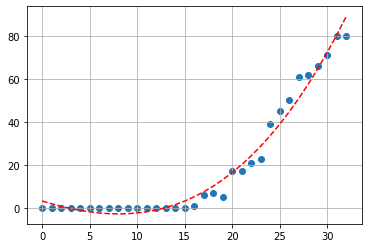

In [22]:
calculate_and_create_chart_for_province(START_DATE, 'Crotone')

## Reggio di Calabria

Total cases per 1000 inhabitants up to today: 0.2528
Total cases up to today: 140
New cases registered today: 17
New cases registered today in %: 13.82
Doubling time in the last five days: 7.5
Doubling time yesterday: 9.1
Trend of new cases (in %) in the last 5 days: 59.09


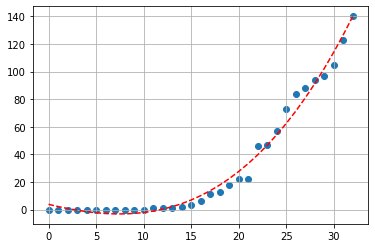

In [23]:
calculate_and_create_chart_for_province(START_DATE, 'Reggio di Calabria')

## Vibo Valentia

Total cases per 1000 inhabitants up to today: 0.1794
Total cases up to today: 29
New cases registered today: 1
New cases registered today in %: 3.57
Doubling time in the last five days: 4.8
Doubling time yesterday: 3.7
Trend of new cases (in %) in the last 5 days: 107.14


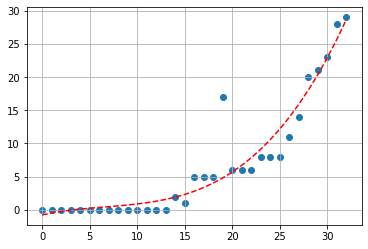

In [24]:
calculate_and_create_chart_for_province(START_DATE, 'Vibo Valentia')

# Casi di COVID-19 in Campania - COVID-19 cases in Campania

Total cases up to today: 1354
New cases registered today: 74
New cases registered today in %: 5.78
Doubling time in the last five days: 9.0
Doubling time yesterday: 8.0
Trend of new cases (in %) in the last 5 days: 46.85


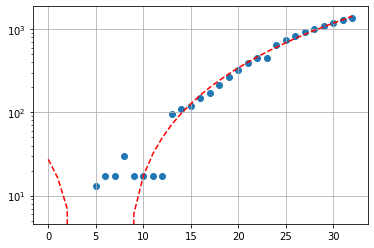

In [25]:
calculate_and_create_chart_for_region(START_DATE, 'Campania')

## Avellino

Total cases per 1000 inhabitants up to today: 0.4297
Total cases up to today: 182
New cases registered today: 2
New cases registered today in %: 1.11
Doubling time in the last five days: 10.8
Doubling time yesterday: 9.3
Trend of new cases (in %) in the last 5 days: 37.88


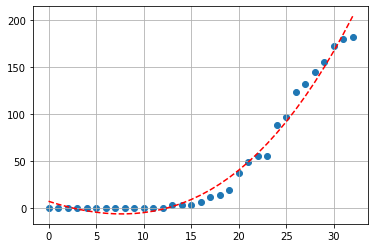

In [26]:
calculate_and_create_chart_for_province(START_DATE, 'Avellino')

## Benevento

Total cases per 1000 inhabitants up to today: 0.0536
Total cases up to today: 15
New cases registered today: 1
New cases registered today in %: 7.14
Doubling time in the last five days: 24.2
Doubling time yesterday: 14.4
Trend of new cases (in %) in the last 5 days: 15.38


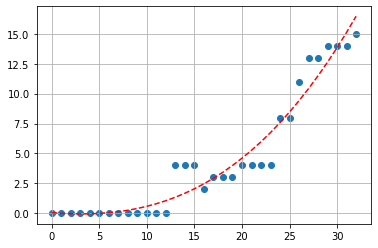

In [27]:
calculate_and_create_chart_for_province(START_DATE, 'Benevento')

## Caserta

Total cases per 1000 inhabitants up to today: 0.1937
Total cases up to today: 179
New cases registered today: 2
New cases registered today in %: 1.13
Doubling time in the last five days: 8.0
Doubling time yesterday: 6.8
Trend of new cases (in %) in the last 5 days: 54.31


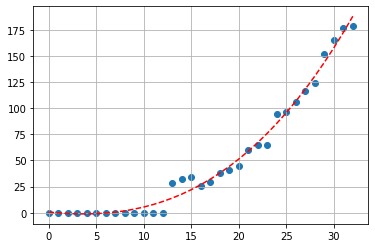

In [28]:
calculate_and_create_chart_for_province(START_DATE, 'Caserta')

## Napoli

Total cases per 1000 inhabitants up to today: 0.2362
Total cases up to today: 734
New cases registered today: 69
New cases registered today in %: 10.38
Doubling time in the last five days: 9.2
Doubling time yesterday: 9.6
Trend of new cases (in %) in the last 5 days: 45.63


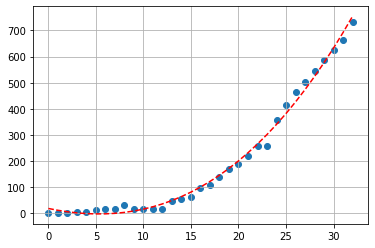

In [29]:
calculate_and_create_chart_for_province(START_DATE, 'Napoli')

## Salerno

Total cases per 1000 inhabitants up to today: 0.2209
Total cases up to today: 244
New cases registered today: 0
New cases registered today in %: 0.0
Doubling time in the last five days: 7.9
Doubling time yesterday: 5.2
Trend of new cases (in %) in the last 5 days: 55.41


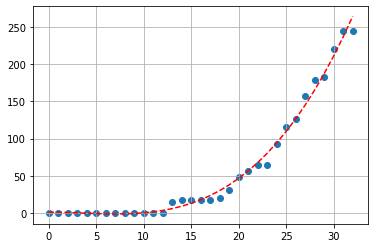

In [30]:
calculate_and_create_chart_for_province(START_DATE, 'Salerno')

# Casi di COVID-19 in Emilia Romagna - COVID-19 cases in Emilia Romagna

Total cases up to today: 11588
New cases registered today: 772
New cases registered today in %: 7.14
Doubling time in the last five days: 8.1
Doubling time yesterday: 7.2
Trend of new cases (in %) in the last 5 days: 53.38


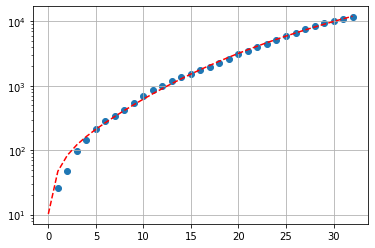

In [31]:
calculate_and_create_chart_for_region(START_DATE, 'Emilia Romagna')

## Bologna

Total cases per 1000 inhabitants up to today: 1.4001
Total cases up to today: 1413
New cases registered today: 160
New cases registered today in %: 12.77
Doubling time in the last five days: 4.7
Doubling time yesterday: 4.8
Trend of new cases (in %) in the last 5 days: 109.64


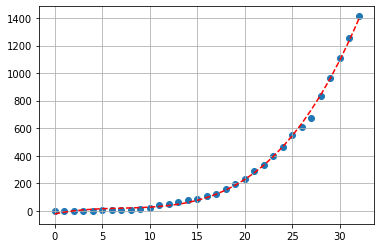

In [32]:
calculate_and_create_chart_for_province(START_DATE, 'Bologna')

## Ferrara

Total cases per 1000 inhabitants up to today: 0.7004
Total cases up to today: 244
New cases registered today: 32
New cases registered today in %: 15.09
Doubling time in the last five days: 7.1
Doubling time yesterday: 6.4
Trend of new cases (in %) in the last 5 days: 62.67


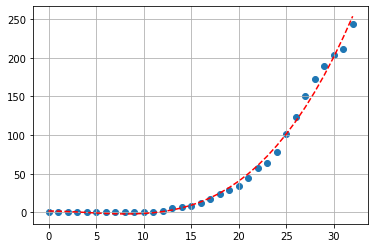

In [33]:
calculate_and_create_chart_for_province(START_DATE, 'Ferrara')

## Modena

Total cases per 1000 inhabitants up to today: 2.5283
Total cases up to today: 1772
New cases registered today: 96
New cases registered today in %: 5.73
Doubling time in the last five days: 6.2
Doubling time yesterday: 5.6
Trend of new cases (in %) in the last 5 days: 75.45


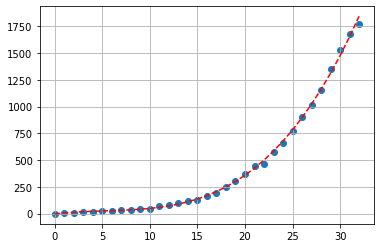

In [34]:
calculate_and_create_chart_for_province(START_DATE, 'Modena')

## Parma

Total cases per 1000 inhabitants up to today: 3.7648
Total cases up to today: 1690
New cases registered today: 79
New cases registered today in %: 4.9
Doubling time in the last five days: 10.3
Doubling time yesterday: 7.5
Trend of new cases (in %) in the last 5 days: 39.78


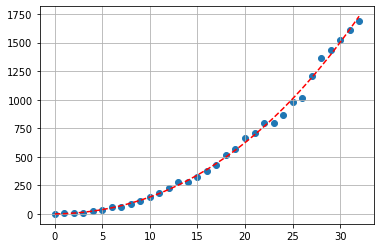

In [35]:
calculate_and_create_chart_for_province(START_DATE, 'Parma')

## Piacenza

Total cases per 1000 inhabitants up to today: 7.937
Total cases up to today: 2276
New cases registered today: 63
New cases registered today in %: 2.85
Doubling time in the last five days: 13.6
Doubling time yesterday: 12.9
Trend of new cases (in %) in the last 5 days: 28.95


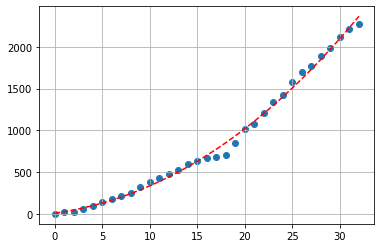

In [36]:
calculate_and_create_chart_for_province(START_DATE, 'Piacenza')

## Ravenna

Total cases per 1000 inhabitants up to today: 1.2468
Total cases up to today: 488
New cases registered today: 37
New cases registered today in %: 8.2
Doubling time in the last five days: 7.6
Doubling time yesterday: 7.7
Trend of new cases (in %) in the last 5 days: 57.93


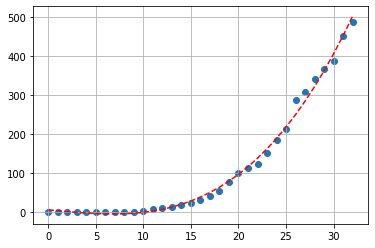

In [37]:
calculate_and_create_chart_for_province(START_DATE, 'Ravenna')

## Reggio nell'Emilia

Total cases per 1000 inhabitants up to today: 3.4949
Total cases up to today: 1861
New cases registered today: 163
New cases registered today in %: 9.6
Doubling time in the last five days: 7.4
Doubling time yesterday: 6.3
Trend of new cases (in %) in the last 5 days: 59.47


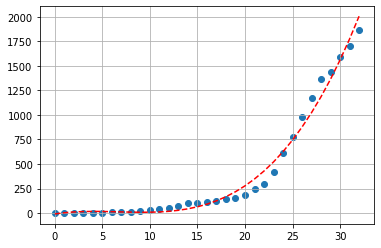

In [38]:
calculate_and_create_chart_for_province(START_DATE, "Reggio nell'Emilia")

## Rimini

Total cases per 1000 inhabitants up to today: 3.7531
Total cases up to today: 1264
New cases registered today: 75
New cases registered today in %: 6.31
Doubling time in the last five days: 11.8
Doubling time yesterday: 9.5
Trend of new cases (in %) in the last 5 days: 34.18


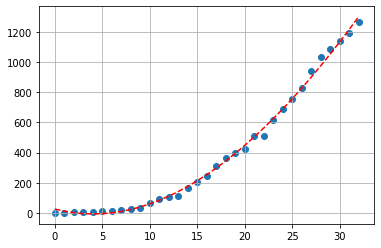

In [39]:
calculate_and_create_chart_for_province(START_DATE, 'Rimini')

# Casi di COVID-19 in Friuli Venezia Giulia - COVID-19 cases in Friuli Venezia Giulia

Total cases up to today: 1309
New cases registered today: 94
New cases registered today in %: 7.74
Doubling time in the last five days: 8.4
Doubling time yesterday: 8.1
Trend of new cases (in %) in the last 5 days: 50.98


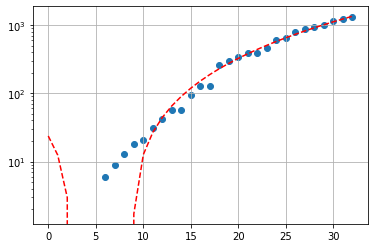

In [40]:
calculate_and_create_chart_for_region(START_DATE, 'Friuli Venezia Giulia')

## Gorizia

Total cases per 1000 inhabitants up to today: 0.5656
Total cases up to today: 79
New cases registered today: 4
New cases registered today in %: 5.33
Doubling time in the last five days: 5.9
Doubling time yesterday: 5.1
Trend of new cases (in %) in the last 5 days: 79.55


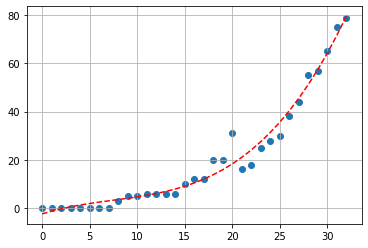

In [41]:
calculate_and_create_chart_for_province(START_DATE, 'Gorizia')

## Pordenone

Total cases per 1000 inhabitants up to today: 1.0639
Total cases up to today: 332
New cases registered today: 37
New cases registered today in %: 12.54
Doubling time in the last five days: 5.0
Doubling time yesterday: 4.8
Trend of new cases (in %) in the last 5 days: 101.21


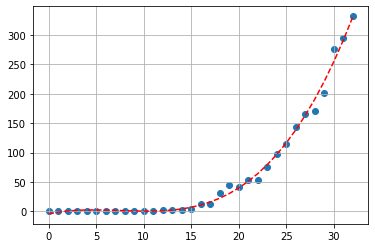

In [42]:
calculate_and_create_chart_for_province(START_DATE, 'Pordenone')

## Trieste

Total cases per 1000 inhabitants up to today: 1.7513
Total cases up to today: 411
New cases registered today: 26
New cases registered today in %: 6.75
Doubling time in the last five days: 10.7
Doubling time yesterday: 9.8
Trend of new cases (in %) in the last 5 days: 38.38


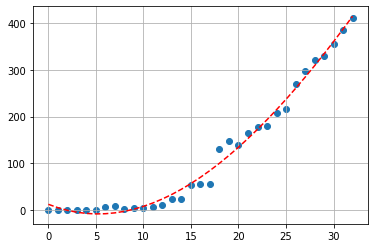

In [43]:
calculate_and_create_chart_for_province(START_DATE, 'Trieste')

## Udine

Total cases per 1000 inhabitants up to today: 0.9163
Total cases up to today: 487
New cases registered today: 27
New cases registered today in %: 5.87
Doubling time in the last five days: 11.6
Doubling time yesterday: 11.2
Trend of new cases (in %) in the last 5 days: 34.9


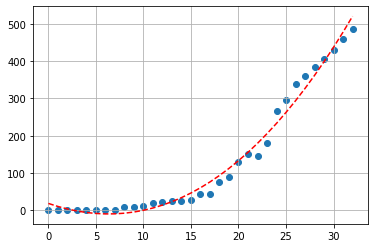

In [44]:
calculate_and_create_chart_for_province(START_DATE, 'Udine')

# Casi di COVID-19 nel Lazio - COVID-19 cases in Lazio

Total cases up to today: 2273
New cases registered today: 181
New cases registered today in %: 8.65
Doubling time in the last five days: 6.9
Doubling time yesterday: 6.1
Trend of new cases (in %) in the last 5 days: 64.83


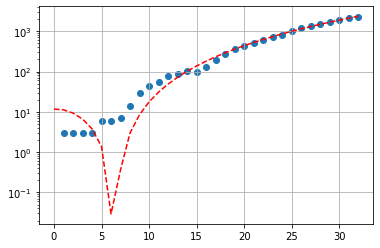

In [45]:
calculate_and_create_chart_for_region(START_DATE, 'Lazio')

## Frosinone

Total cases per 1000 inhabitants up to today: 0.3874
Total cases up to today: 191
New cases registered today: 35
New cases registered today in %: 22.44
Doubling time in the last five days: 3.9
Doubling time yesterday: 3.6
Trend of new cases (in %) in the last 5 days: 144.87


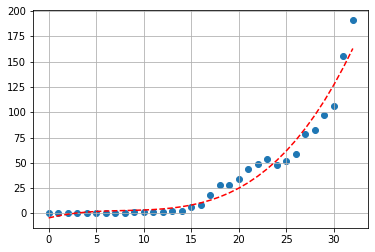

In [46]:
calculate_and_create_chart_for_province(START_DATE, 'Frosinone')

## Latina

Total cases per 1000 inhabitants up to today: 0.3688
Total cases up to today: 212
New cases registered today: 6
New cases registered today in %: 2.91
Doubling time in the last five days: 9.3
Doubling time yesterday: 8.3
Trend of new cases (in %) in the last 5 days: 45.21


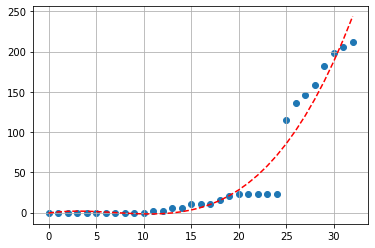

In [47]:
calculate_and_create_chart_for_province(START_DATE, 'Latina')

## Rieti

Total cases per 1000 inhabitants up to today: 0.2732
Total cases up to today: 43
New cases registered today: 2
New cases registered today in %: 4.88
Doubling time in the last five days: 5.9
Doubling time yesterday: 6.5
Trend of new cases (in %) in the last 5 days: 79.17


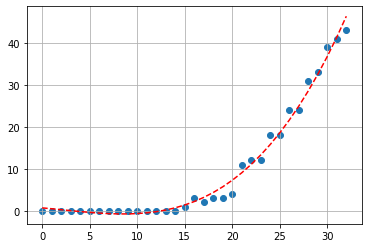

In [48]:
calculate_and_create_chart_for_province(START_DATE, 'Rieti')

## Roma

Total cases per 1000 inhabitants up to today: 0.3912
Total cases up to today: 1703
New cases registered today: 136
New cases registered today in %: 8.68
Doubling time in the last five days: 7.2
Doubling time yesterday: 6.2
Trend of new cases (in %) in the last 5 days: 62.35


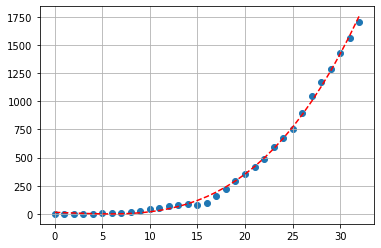

In [49]:
calculate_and_create_chart_for_province(START_DATE, 'Roma')

## Viterbo

Total cases per 1000 inhabitants up to today: 0.3887
Total cases up to today: 124
New cases registered today: 2
New cases registered today in %: 1.64
Doubling time in the last five days: 8.4
Doubling time yesterday: 6.6
Trend of new cases (in %) in the last 5 days: 51.22


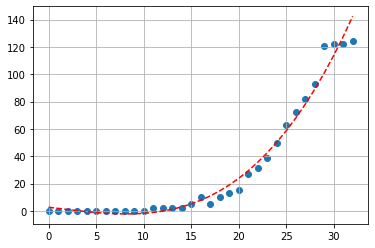

In [50]:
calculate_and_create_chart_for_province(START_DATE, 'Viterbo')

# Casi di COVID-19 in Liguria - COVID-19 cases in Liguria

Total cases up to today: 1467
New cases registered today: 136
New cases registered today in %: 10.22
Doubling time in the last five days: 12.8
Doubling time yesterday: 11.4
Trend of new cases (in %) in the last 5 days: 31.1


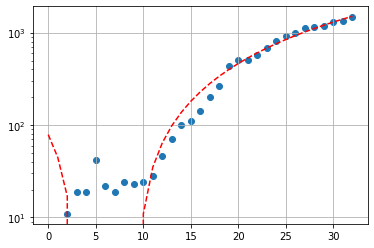

In [51]:
calculate_and_create_chart_for_region(START_DATE, 'Liguria')

## Genova

Total cases per 1000 inhabitants up to today: 0.9611
Total cases up to today: 817
New cases registered today: 55
New cases registered today in %: 7.22
Doubling time in the last five days: 18.4
Doubling time yesterday: 11.3
Trend of new cases (in %) in the last 5 days: 20.68


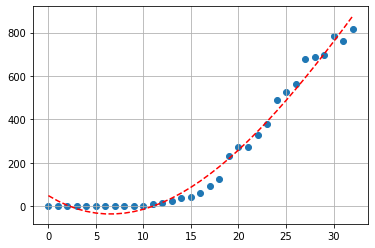

In [52]:
calculate_and_create_chart_for_province(START_DATE, 'Genova')

## Imperia

Total cases per 1000 inhabitants up to today: 0.9947
Total cases up to today: 214
New cases registered today: 3
New cases registered today in %: 1.42
Doubling time in the last five days: 14.3
Doubling time yesterday: 11.2
Trend of new cases (in %) in the last 5 days: 27.38


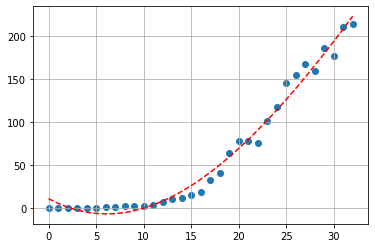

In [53]:
calculate_and_create_chart_for_province(START_DATE, 'Imperia')

## La Spezia

Total cases per 1000 inhabitants up to today: 0.9651
Total cases up to today: 213
New cases registered today: 64
New cases registered today in %: 42.95
Doubling time in the last five days: 4.5
Doubling time yesterday: 7.5
Trend of new cases (in %) in the last 5 days: 115.15


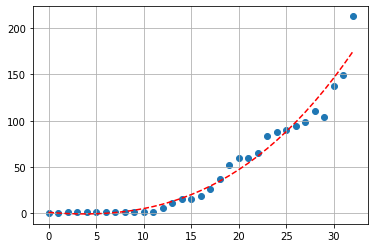

In [54]:
calculate_and_create_chart_for_province(START_DATE, 'La Spezia')

## Savona

Total cases per 1000 inhabitants up to today: 0.7981
Total cases up to today: 223
New cases registered today: 14
New cases registered today in %: 6.7
Doubling time in the last five days: 14.3
Doubling time yesterday: 18.3
Trend of new cases (in %) in the last 5 days: 27.43


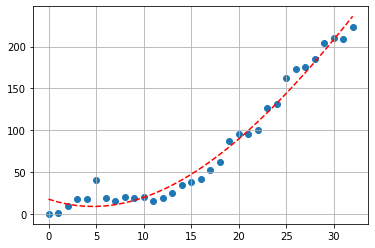

In [55]:
calculate_and_create_chart_for_province(START_DATE, 'Savona')

# Casi di COVID-19 in Lombardia - COVID-19 cases in Lombardy

Total cases up to today: 36493
New cases registered today: 2411
New cases registered today in %: 7.07
Doubling time in the last five days: 10.9
Doubling time yesterday: 11.1
Trend of new cases (in %) in the last 5 days: 37.24


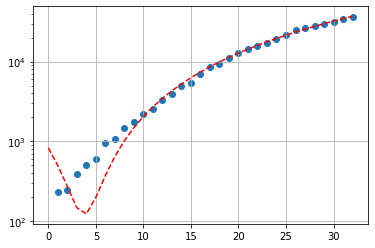

In [56]:
calculate_and_create_chart_for_region(START_DATE, 'Lombardia')

## Bergamo

Total cases per 1000 inhabitants up to today: 7.2617
Total cases up to today: 8060
New cases registered today: 602
New cases registered today in %: 8.07
Doubling time in the last five days: 13.3
Doubling time yesterday: 14.5
Trend of new cases (in %) in the last 5 days: 29.67


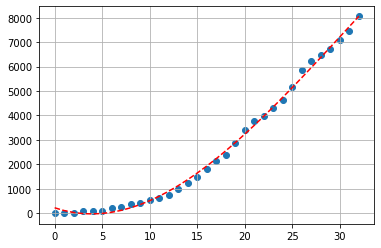

In [57]:
calculate_and_create_chart_for_province(START_DATE, 'Bergamo')

## Brescia

Total cases per 1000 inhabitants up to today: 5.787
Total cases up to today: 7305
New cases registered today: 374
New cases registered today in %: 5.4
Doubling time in the last five days: 10.9
Doubling time yesterday: 10.8
Trend of new cases (in %) in the last 5 days: 37.39


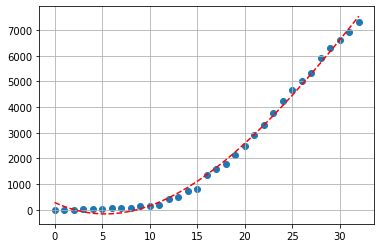

In [58]:
calculate_and_create_chart_for_province(START_DATE, 'Brescia')

## Como

Total cases per 1000 inhabitants up to today: 1.3596
Total cases up to today: 816
New cases registered today: 54
New cases registered today in %: 7.09
Doubling time in the last five days: 7.4
Doubling time yesterday: 6.6
Trend of new cases (in %) in the last 5 days: 59.38


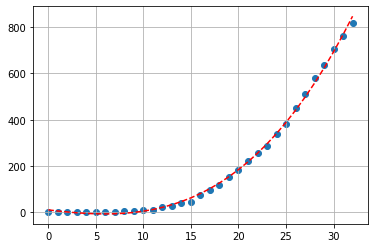

In [59]:
calculate_and_create_chart_for_province(START_DATE, 'Como')

## Cremona

Total cases per 1000 inhabitants up to today: 9.7276
Total cases up to today: 3496
New cases registered today: 126
New cases registered today in %: 3.74
Doubling time in the last five days: 18.4
Doubling time yesterday: 16.5
Trend of new cases (in %) in the last 5 days: 20.76


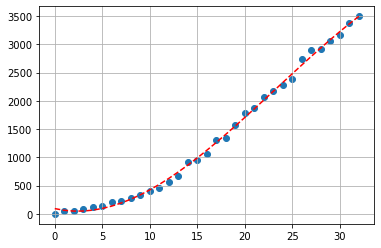

In [60]:
calculate_and_create_chart_for_province(START_DATE, 'Cremona')

## Lecco

Total cases per 1000 inhabitants up to today: 3.5668
Total cases up to today: 1210
New cases registered today: 51
New cases registered today in %: 4.4
Doubling time in the last five days: 10.6
Doubling time yesterday: 9.9
Trend of new cases (in %) in the last 5 days: 38.76


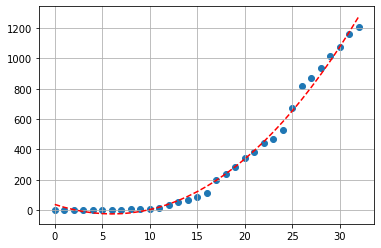

In [61]:
calculate_and_create_chart_for_province(START_DATE, 'Lecco')

## Lodi

Total cases per 1000 inhabitants up to today: 8.7469
Total cases up to today: 2006
New cases registered today: 38
New cases registered today in %: 1.93
Doubling time in the last five days: 27.9
Doubling time yesterday: 23.0
Trend of new cases (in %) in the last 5 days: 13.21


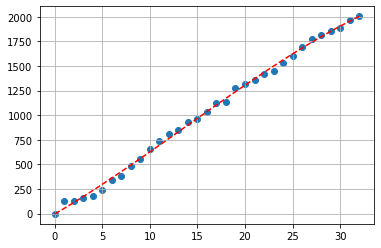

In [62]:
calculate_and_create_chart_for_province(START_DATE, 'Lodi')

## Mantova

Total cases per 1000 inhabitants up to today: 3.3882
Total cases up to today: 1398
New cases registered today: 148
New cases registered today in %: 11.84
Doubling time in the last five days: 8.0
Doubling time yesterday: 8.8
Trend of new cases (in %) in the last 5 days: 54.48


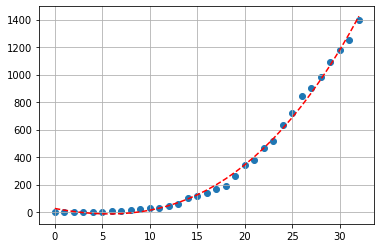

In [63]:
calculate_and_create_chart_for_province(START_DATE, 'Mantova')

## Milano

Total cases per 1000 inhabitants up to today: 2.3209
Total cases up to today: 7469
New cases registered today: 547
New cases registered today in %: 7.9
Doubling time in the last five days: 9.1
Doubling time yesterday: 8.8
Trend of new cases (in %) in the last 5 days: 46.57


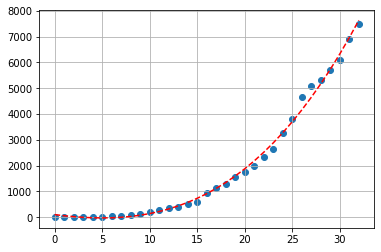

In [64]:
calculate_and_create_chart_for_province(START_DATE, 'Milano')

## Monza e della Brianza

Total cases per 1000 inhabitants up to today: 2.242
Total cases up to today: 1948
New cases registered today: 198
New cases registered today in %: 11.31
Doubling time in the last five days: 6.1
Doubling time yesterday: 7.2
Trend of new cases (in %) in the last 5 days: 75.81


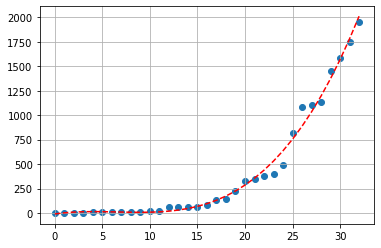

In [65]:
calculate_and_create_chart_for_province(START_DATE, 'Monza e della Brianza')

## Pavia

Total cases per 1000 inhabitants up to today: 3.1284
Total cases up to today: 1712
New cases registered today: 27
New cases registered today in %: 1.6
Doubling time in the last five days: 12.8
Doubling time yesterday: 10.1
Trend of new cases (in %) in the last 5 days: 31.09


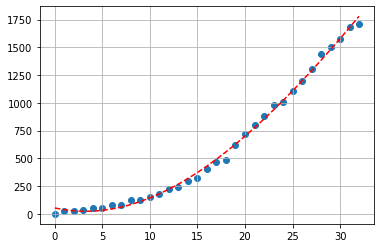

In [66]:
calculate_and_create_chart_for_province(START_DATE, 'Pavia')

## Sondrio

Total cases per 1000 inhabitants up to today: 1.9952
Total cases up to today: 362
New cases registered today: 37
New cases registered today in %: 11.38
Doubling time in the last five days: 6.1
Doubling time yesterday: 5.8
Trend of new cases (in %) in the last 5 days: 76.59


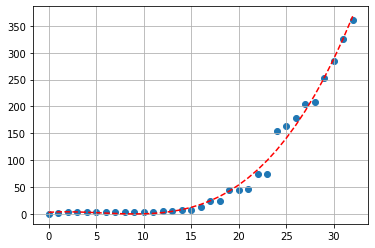

In [67]:
calculate_and_create_chart_for_province(START_DATE, 'Sondrio')

## Varese

Total cases per 1000 inhabitants up to today: 0.7988
Total cases up to today: 711
New cases registered today: 209
New cases registered today in %: 41.63
Doubling time in the last five days: 5.7
Doubling time yesterday: 10.3
Trend of new cases (in %) in the last 5 days: 84.2


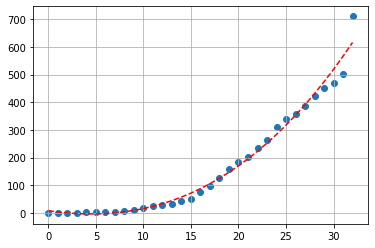

In [68]:
calculate_and_create_chart_for_province(START_DATE, 'Varese')

# Casi di COVID-19 nelle Marche - COVID-19 cases in Marche

Total cases up to today: 3142
New cases registered today: 79
New cases registered today in %: 2.58
Doubling time in the last five days: 12.6
Doubling time yesterday: 9.4
Trend of new cases (in %) in the last 5 days: 31.63


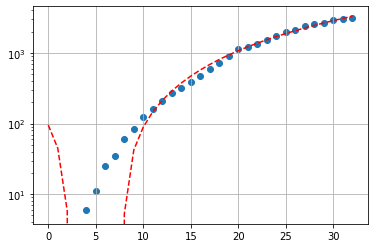

In [69]:
calculate_and_create_chart_for_region(START_DATE, 'Marche')

## Ancona

Total cases per 1000 inhabitants up to today: 1.9088
Total cases up to today: 905
New cases registered today: 36
New cases registered today in %: 4.14
Doubling time in the last five days: 11.9
Doubling time yesterday: 8.0
Trend of new cases (in %) in the last 5 days: 33.88


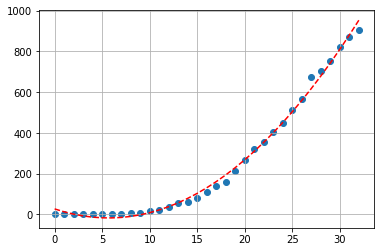

In [70]:
calculate_and_create_chart_for_province(START_DATE, 'Ancona')

## Ascoli Piceno

Total cases per 1000 inhabitants up to today: 0.5634
Total cases up to today: 118
New cases registered today: 7
New cases registered today in %: 6.31
Doubling time in the last five days: 4.6
Doubling time yesterday: 4.3
Trend of new cases (in %) in the last 5 days: 110.71


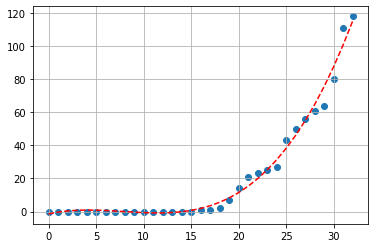

In [71]:
calculate_and_create_chart_for_province(START_DATE, 'Ascoli Piceno')

## Fermo

Total cases per 1000 inhabitants up to today: 1.3326
Total cases up to today: 233
New cases registered today: 29
New cases registered today in %: 14.22
Doubling time in the last five days: 4.8
Doubling time yesterday: 3.8
Trend of new cases (in %) in the last 5 days: 106.19


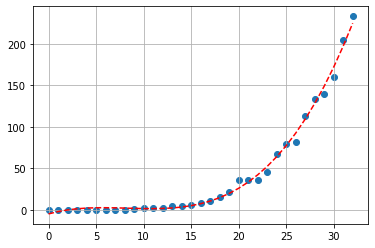

In [72]:
calculate_and_create_chart_for_province(START_DATE, 'Fermo')

## Macerata

Total cases per 1000 inhabitants up to today: 1.2887
Total cases up to today: 411
New cases registered today: 6
New cases registered today in %: 1.48
Doubling time in the last five days: 10.2
Doubling time yesterday: 6.5
Trend of new cases (in %) in the last 5 days: 40.27


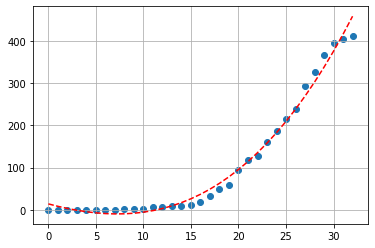

In [73]:
calculate_and_create_chart_for_province(START_DATE, 'Macerata')

## Pesaro e Urbino

Total cases per 1000 inhabitants up to today: 4.0891
Total cases up to today: 1475
New cases registered today: 1
New cases registered today in %: 0.07
Doubling time in the last five days: 20.8
Doubling time yesterday: 15.9
Trend of new cases (in %) in the last 5 days: 18.09


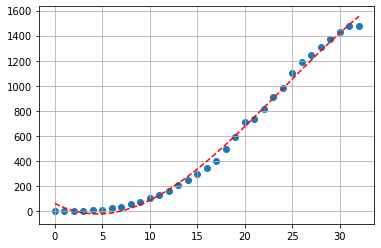

In [74]:
calculate_and_create_chart_for_province(START_DATE, 'Pesaro e Urbino')

# Casi di COVID-19 in Molise - COVID-19 cases in Molise¶

Total cases up to today: 100
New cases registered today: 6
New cases registered today in %: 6.38
Doubling time in the last five days: 6.2
Doubling time yesterday: 6.0
Trend of new cases (in %) in the last 5 days: 75.44


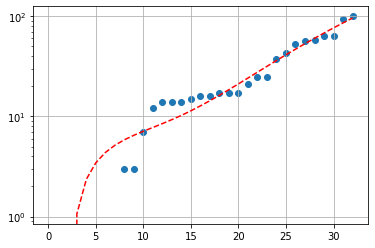

In [75]:
calculate_and_create_chart_for_region(START_DATE, 'Molise')

## Campobasso

Total cases per 1000 inhabitants up to today: 0.4051
Total cases up to today: 91
New cases registered today: 6
New cases registered today in %: 7.06
Doubling time in the last five days: 6.4
Doubling time yesterday: 6.3
Trend of new cases (in %) in the last 5 days: 71.7


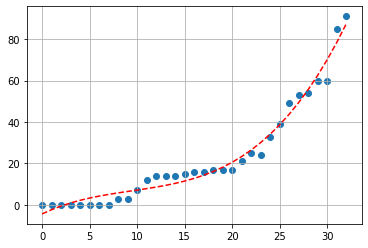

In [76]:
calculate_and_create_chart_for_province(START_DATE, 'Campobasso')

## Isernia

Total cases per 1000 inhabitants up to today: 0.1049
Total cases up to today: 9
New cases registered today: 0
New cases registered today in %: 0.0
Doubling time in the last five days: 4.3
Doubling time yesterday: 4.3
Trend of new cases (in %) in the last 5 days: 125.0


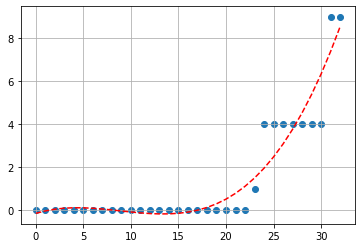

In [77]:
calculate_and_create_chart_for_province(START_DATE, 'Isernia')

# Casi di COVID-19 in Piemonte - COVID-19 cases in Piedmont 

Total cases up to today: 6910
New cases registered today: 549
New cases registered today in %: 8.63
Doubling time in the last five days: 7.2
Doubling time yesterday: 6.2
Trend of new cases (in %) in the last 5 days: 61.64


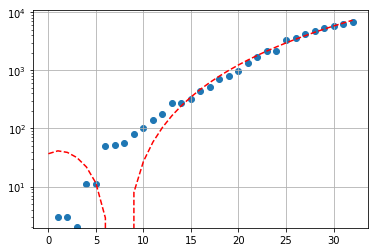

In [78]:
calculate_and_create_chart_for_region(START_DATE, 'Piemonte')

## Alessandria

Total cases per 1000 inhabitants up to today: 2.5922
Total cases up to today: 1106
New cases registered today: 126
New cases registered today in %: 12.86
Doubling time in the last five days: 9.2
Doubling time yesterday: 8.6
Trend of new cases (in %) in the last 5 days: 45.53


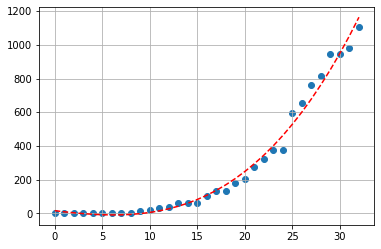

In [79]:
calculate_and_create_chart_for_province(START_DATE, 'Alessandria')

## Asti

Total cases per 1000 inhabitants up to today: 1.3984
Total cases up to today: 303
New cases registered today: 21
New cases registered today in %: 7.45
Doubling time in the last five days: 6.7
Doubling time yesterday: 6.5
Trend of new cases (in %) in the last 5 days: 67.4


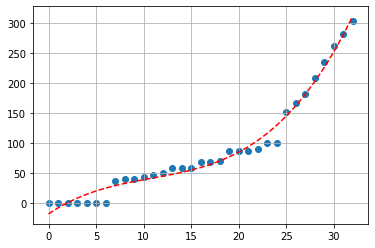

In [80]:
calculate_and_create_chart_for_province(START_DATE, 'Asti')

## Biella

Total cases per 1000 inhabitants up to today: 2.0554
Total cases up to today: 367
New cases registered today: 31
New cases registered today in %: 9.23
Doubling time in the last five days: 8.4
Doubling time yesterday: 5.7
Trend of new cases (in %) in the last 5 days: 51.03


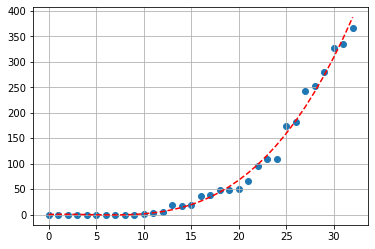

In [81]:
calculate_and_create_chart_for_province(START_DATE, 'Biella')

## Cuneo

Total cases per 1000 inhabitants up to today: 0.8793
Total cases up to today: 518
New cases registered today: 31
New cases registered today in %: 6.37
Doubling time in the last five days: 6.5
Doubling time yesterday: 5.7
Trend of new cases (in %) in the last 5 days: 70.96


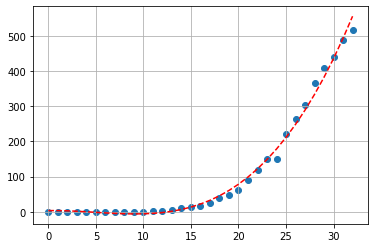

In [82]:
calculate_and_create_chart_for_province(START_DATE, 'Cuneo')

## Novara

Total cases per 1000 inhabitants up to today: 1.6453
Total cases up to today: 609
New cases registered today: 32
New cases registered today in %: 5.55
Doubling time in the last five days: 8.1
Doubling time yesterday: 6.2
Trend of new cases (in %) in the last 5 days: 53.02


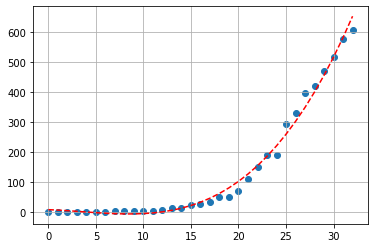

In [83]:
calculate_and_create_chart_for_province(START_DATE, 'Novara')

## Torino

Total cases per 1000 inhabitants up to today: 1.4755
Total cases up to today: 3361
New cases registered today: 253
New cases registered today in %: 8.14
Doubling time in the last five days: 6.6
Doubling time yesterday: 5.6
Trend of new cases (in %) in the last 5 days: 68.98


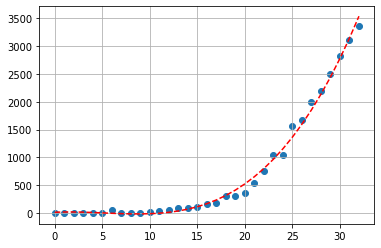

In [84]:
calculate_and_create_chart_for_province(START_DATE, 'Torino')

## 	Verbano-Cusio-Ossola

Total cases per 1000 inhabitants up to today: 1.8038
Total cases up to today: 288
New cases registered today: 33
New cases registered today in %: 12.94
Doubling time in the last five days: 5.8
Doubling time yesterday: 6.5
Trend of new cases (in %) in the last 5 days: 81.13


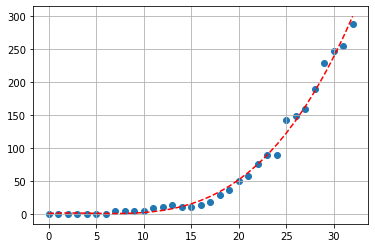

In [85]:
calculate_and_create_chart_for_province(START_DATE, 'Verbano-Cusio-Ossola')

## Vercelli

Total cases per 1000 inhabitants up to today: 2.059
Total cases up to today: 358
New cases registered today: 22
New cases registered today in %: 6.55
Doubling time in the last five days: 8.9
Doubling time yesterday: 7.4
Trend of new cases (in %) in the last 5 days: 47.93


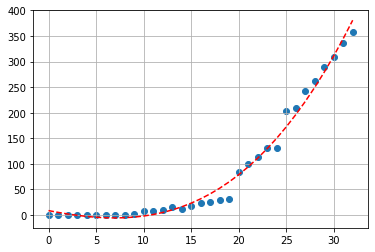

In [86]:
calculate_and_create_chart_for_province(START_DATE, 'Vercelli')

# Casi di COVID-19 in Puglia - COVID-19 cases in Apulia

Total cases up to today: 1279
New cases registered today: 129
New cases registered today in %: 11.22
Doubling time in the last five days: 6.5
Doubling time yesterday: 6.0
Trend of new cases (in %) in the last 5 days: 69.85


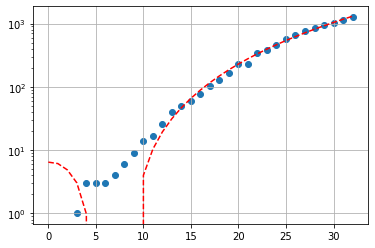

In [87]:
calculate_and_create_chart_for_region(START_DATE, 'Puglia')

## Bari

Total cases per 1000 inhabitants up to today: 0.3523
Total cases up to today: 444
New cases registered today: 57
New cases registered today in %: 14.73
Doubling time in the last five days: 5.3
Doubling time yesterday: 5.0
Trend of new cases (in %) in the last 5 days: 92.21


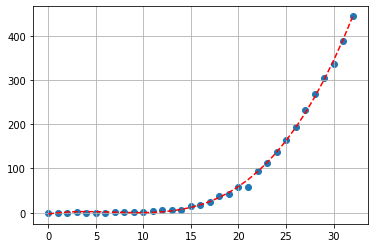

In [88]:
calculate_and_create_chart_for_province(START_DATE, 'Bari')

## 	Barletta-Andria-Trani

Total cases per 1000 inhabitants up to today: 0.2344
Total cases up to today: 92
New cases registered today: 7
New cases registered today in %: 8.24
Doubling time in the last five days: 5.5
Doubling time yesterday: 3.5
Trend of new cases (in %) in the last 5 days: 87.76


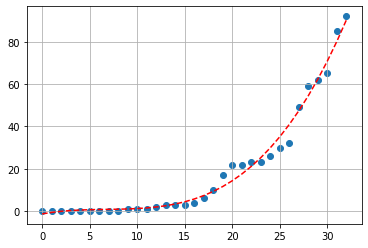

In [89]:
calculate_and_create_chart_for_province(START_DATE, 'Barletta-Andria-Trani')

## Brindisi

Total cases per 1000 inhabitants up to today: 0.3148
Total cases up to today: 125
New cases registered today: 3
New cases registered today in %: 2.46
Doubling time in the last five days: 15.5
Doubling time yesterday: 13.3
Trend of new cases (in %) in the last 5 days: 25.0


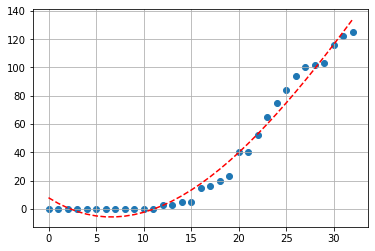

In [90]:
calculate_and_create_chart_for_province(START_DATE, 'Brindisi')

## Foggia

Total cases per 1000 inhabitants up to today: 0.5171
Total cases up to today: 325
New cases registered today: 20
New cases registered today in %: 6.56
Doubling time in the last five days: 8.1
Doubling time yesterday: 7.3
Trend of new cases (in %) in the last 5 days: 53.3


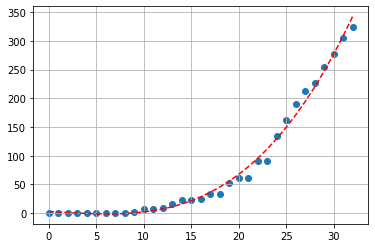

In [91]:
calculate_and_create_chart_for_province(START_DATE, 'Foggia')

## Lecce

Total cases per 1000 inhabitants up to today: 0.2681
Total cases up to today: 215
New cases registered today: 38
New cases registered today in %: 21.47
Doubling time in the last five days: 5.9
Doubling time yesterday: 6.4
Trend of new cases (in %) in the last 5 days: 79.17


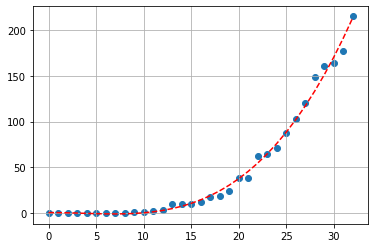

In [92]:
calculate_and_create_chart_for_province(START_DATE, 'Lecce')

## Taranto

Total cases per 1000 inhabitants up to today: 0.1337
Total cases up to today: 78
New cases registered today: 4
New cases registered today in %: 5.41
Doubling time in the last five days: 5.4
Doubling time yesterday: 4.6
Trend of new cases (in %) in the last 5 days: 90.24


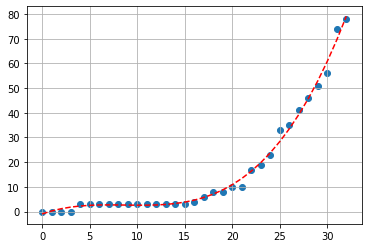

In [93]:
calculate_and_create_chart_for_province(START_DATE, 'Taranto')

# Casi di COVID-19 in Sardegna - COVID-19 cases in Sardinia

Total cases up to today: 530
New cases registered today: 36
New cases registered today in %: 7.29
Doubling time in the last five days: 7.8
Doubling time yesterday: 8.6
Trend of new cases (in %) in the last 5 days: 56.34


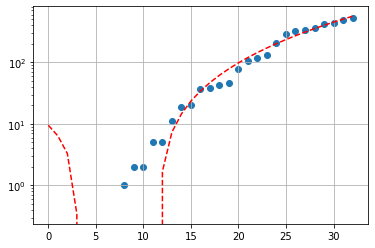

In [94]:
calculate_and_create_chart_for_region(START_DATE, 'Sardegna')

## Cagliari

Total cases per 1000 inhabitants up to today: 0.1481
Total cases up to today: 83
New cases registered today: 0
New cases registered today in %: 0.0
Doubling time in the last five days: 7.4
Doubling time yesterday: 5.7
Trend of new cases (in %) in the last 5 days: 59.62


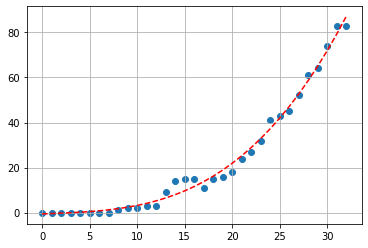

In [95]:
calculate_and_create_chart_for_province(START_DATE, 'Cagliari')

## Nuoro

Total cases per 1000 inhabitants up to today: 0.3331
Total cases up to today: 52
New cases registered today: 0
New cases registered today in %: 0.0
Doubling time in the last five days: 4.0
Doubling time yesterday: 4.0
Trend of new cases (in %) in the last 5 days: 136.36


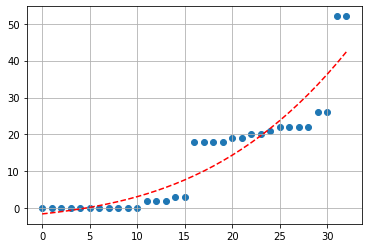

In [96]:
calculate_and_create_chart_for_province(START_DATE, 'Nuoro')

## Oristano

Total cases per 1000 inhabitants up to today: 0.056
Total cases up to today: 9
New cases registered today: 2
New cases registered today in %: 28.57
Doubling time in the last five days: 4.3
Doubling time yesterday: 6.2
Trend of new cases (in %) in the last 5 days: 125.0


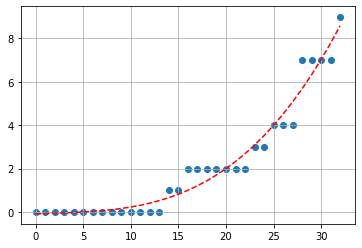

In [97]:
calculate_and_create_chart_for_province(START_DATE, 'Oristano')

## Sassari

Total cases per 1000 inhabitants up to today: 1.0087
Total cases up to today: 336
New cases registered today: 5
New cases registered today in %: 1.51
Doubling time in the last five days: 12.2
Doubling time yesterday: 12.5
Trend of new cases (in %) in the last 5 days: 32.81


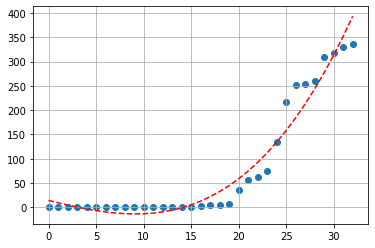

In [98]:
calculate_and_create_chart_for_province(START_DATE, 'Sassari')

# Casi di COVID-19 in Sicilia - COVID-19 cases in Sicily

Total cases up to today: 1250
New cases registered today: 86
New cases registered today in %: 7.39
Doubling time in the last five days: 5.1
Doubling time yesterday: 4.0
Trend of new cases (in %) in the last 5 days: 98.41


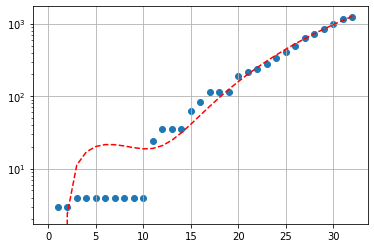

In [99]:
calculate_and_create_chart_for_region(START_DATE, 'Sicilia')

## Agrigento

Total cases per 1000 inhabitants up to today: 0.1312
Total cases up to today: 58
New cases registered today: 3
New cases registered today in %: 5.45
Doubling time in the last five days: 10.0
Doubling time yesterday: 8.2
Trend of new cases (in %) in the last 5 days: 41.46


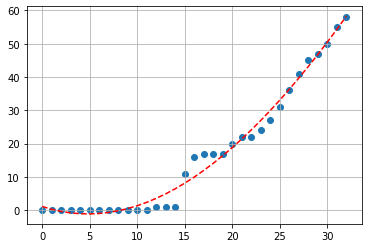

In [100]:
calculate_and_create_chart_for_province(START_DATE, 'Agrigento')

## Caltanissetta

Total cases per 1000 inhabitants up to today: 0.2039
Total cases up to today: 55
New cases registered today: 5
New cases registered today in %: 10.0
Doubling time in the last five days: 4.9
Doubling time yesterday: 5.6
Trend of new cases (in %) in the last 5 days: 103.7


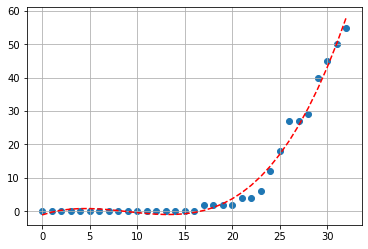

In [101]:
calculate_and_create_chart_for_province(START_DATE, 'Caltanissetta')

## Catania

Total cases per 1000 inhabitants up to today: 0.3279
Total cases up to today: 365
New cases registered today: 19
New cases registered today in %: 5.49
Doubling time in the last five days: 7.8
Doubling time yesterday: 5.7
Trend of new cases (in %) in the last 5 days: 55.98


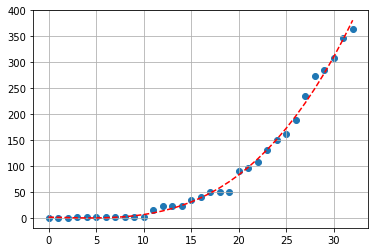

In [102]:
calculate_and_create_chart_for_province(START_DATE, 'Catania')

## Enna

Total cases per 1000 inhabitants up to today: 0.9223
Total cases up to today: 155
New cases registered today: 22
New cases registered today in %: 16.54
Doubling time in the last five days: 2.3
Doubling time yesterday: 2.2
Trend of new cases (in %) in the last 5 days: 355.88


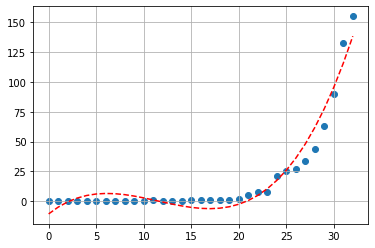

In [103]:
calculate_and_create_chart_for_province(START_DATE, 'Enna')

## Messina

Total cases per 1000 inhabitants up to today: 0.3566
Total cases up to today: 227
New cases registered today: 6
New cases registered today in %: 2.71
Doubling time in the last five days: 4.9
Doubling time yesterday: 3.0
Trend of new cases (in %) in the last 5 days: 102.68


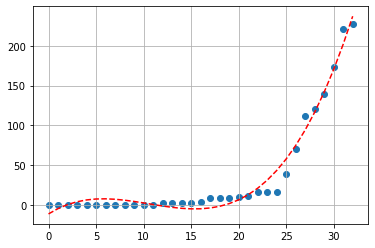

In [104]:
calculate_and_create_chart_for_province(START_DATE, 'Messina')

## Palermo

Total cases per 1000 inhabitants up to today: 0.1719
Total cases up to today: 218
New cases registered today: 13
New cases registered today in %: 6.34
Doubling time in the last five days: 4.0
Doubling time yesterday: 2.9
Trend of new cases (in %) in the last 5 days: 136.96


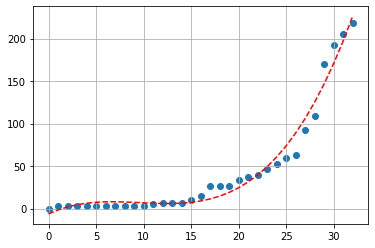

In [105]:
calculate_and_create_chart_for_province(START_DATE, 'Palermo')

## Ragusa

Total cases per 1000 inhabitants up to today: 0.0996
Total cases up to today: 32
New cases registered today: 4
New cases registered today in %: 14.29
Doubling time in the last five days: 2.7
Doubling time yesterday: 2.8
Trend of new cases (in %) in the last 5 days: 255.56


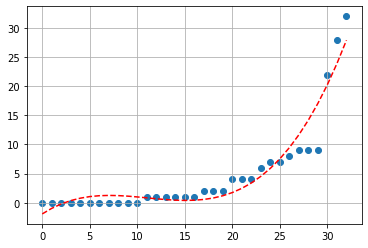

In [106]:
calculate_and_create_chart_for_province(START_DATE, 'Ragusa')

## Siracusa

Total cases per 1000 inhabitants up to today: 0.1961
Total cases up to today: 79
New cases registered today: 2
New cases registered today in %: 2.6
Doubling time in the last five days: 7.3
Doubling time yesterday: 5.9
Trend of new cases (in %) in the last 5 days: 61.22


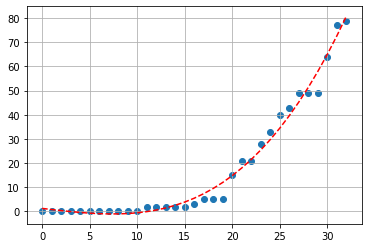

In [107]:
calculate_and_create_chart_for_province(START_DATE, 'Siracusa')

## Trapani

Total cases per 1000 inhabitants up to today: 0.1404
Total cases up to today: 61
New cases registered today: 12
New cases registered today in %: 24.49
Doubling time in the last five days: 5.4
Doubling time yesterday: 5.8
Trend of new cases (in %) in the last 5 days: 90.62


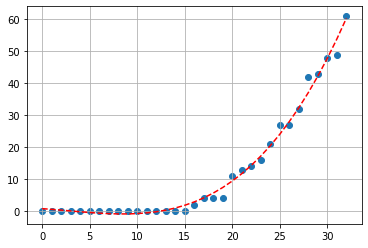

In [108]:
calculate_and_create_chart_for_province(START_DATE, 'Trapani')

# Casi di COVID-19 in Toscana - COVID-19 cases in Tuscany

Total cases up to today: 3225
New cases registered today: 0
New cases registered today in %: 0.0
Doubling time in the last five days: 10.0
Doubling time yesterday: 7.3
Trend of new cases (in %) in the last 5 days: 41.63


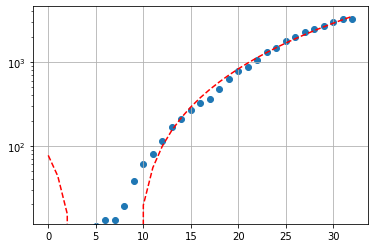

In [109]:
calculate_and_create_chart_for_region(START_DATE, 'Toscana')

## Arezzo

Total cases per 1000 inhabitants up to today: 0.7231
Total cases up to today: 249
New cases registered today: 0
New cases registered today in %: 0.0
Doubling time in the last five days: 7.2
Doubling time yesterday: 5.7
Trend of new cases (in %) in the last 5 days: 61.69


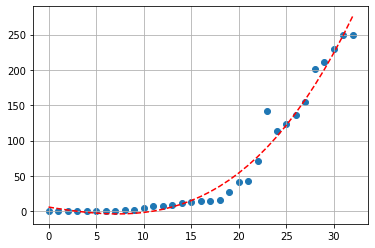

In [110]:
calculate_and_create_chart_for_province(START_DATE, 'Arezzo')

## Firenze

Total cases per 1000 inhabitants up to today: 0.7531
Total cases up to today: 764
New cases registered today: 0
New cases registered today in %: 0.0
Doubling time in the last five days: 8.7
Doubling time yesterday: 6.6
Trend of new cases (in %) in the last 5 days: 48.64


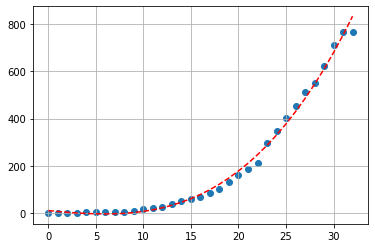

In [111]:
calculate_and_create_chart_for_province(START_DATE, 'Firenze')

## Grosseto

Total cases per 1000 inhabitants up to today: 0.7801
Total cases up to today: 174
New cases registered today: 0
New cases registered today in %: 0.0
Doubling time in the last five days: 9.3
Doubling time yesterday: 7.0
Trend of new cases (in %) in the last 5 days: 45.0


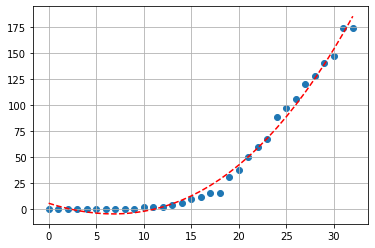

In [112]:
calculate_and_create_chart_for_province(START_DATE, 'Grosseto')

## Livorno

Total cases per 1000 inhabitants up to today: 0.6047
Total cases up to today: 204
New cases registered today: 0
New cases registered today in %: 0.0
Doubling time in the last five days: 7.7
Doubling time yesterday: 6.5
Trend of new cases (in %) in the last 5 days: 56.92


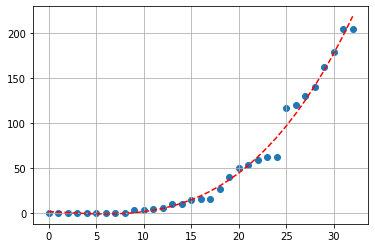

In [113]:
calculate_and_create_chart_for_province(START_DATE, 'Livorno')

## Lucca

Total cases per 1000 inhabitants up to today: 1.2332
Total cases up to today: 481
New cases registered today: 0
New cases registered today in %: 0.0
Doubling time in the last five days: 11.5
Doubling time yesterday: 7.7
Trend of new cases (in %) in the last 5 days: 35.11


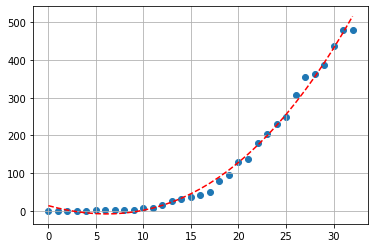

In [114]:
calculate_and_create_chart_for_province(START_DATE, 'Lucca')

## Massa Carrara

Total cases per 1000 inhabitants up to today: 1.6991
Total cases up to today: 334
New cases registered today: 0
New cases registered today in %: 0.0
Doubling time in the last five days: 20.1
Doubling time yesterday: 13.0
Trend of new cases (in %) in the last 5 days: 18.86


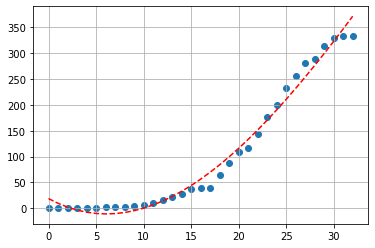

In [115]:
calculate_and_create_chart_for_province(START_DATE, 'Massa Carrara')

## Pisa

Total cases per 1000 inhabitants up to today: 0.8297
Total cases up to today: 350
New cases registered today: 0
New cases registered today in %: 0.0
Doubling time in the last five days: 8.6
Doubling time yesterday: 6.8
Trend of new cases (in %) in the last 5 days: 49.57


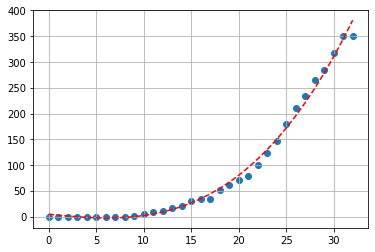

In [116]:
calculate_and_create_chart_for_province(START_DATE, 'Pisa')

## Pistoia

Total cases per 1000 inhabitants up to today: 0.9046
Total cases up to today: 264
New cases registered today: 0
New cases registered today in %: 0.0
Doubling time in the last five days: 16.9
Doubling time yesterday: 9.2
Trend of new cases (in %) in the last 5 days: 22.79


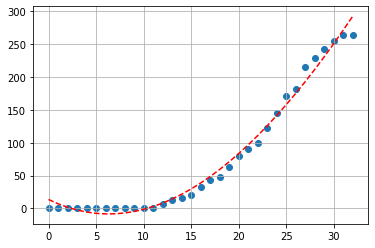

In [117]:
calculate_and_create_chart_for_province(START_DATE, 'Pistoia')

## Prato

Total cases per 1000 inhabitants up to today: 0.7423
Total cases up to today: 189
New cases registered today: 0
New cases registered today in %: 0.0
Doubling time in the last five days: 9.1
Doubling time yesterday: 6.5
Trend of new cases (in %) in the last 5 days: 46.51


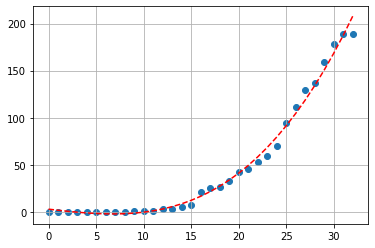

In [118]:
calculate_and_create_chart_for_province(START_DATE, 'Prato')

## Siena

Total cases per 1000 inhabitants up to today: 0.8049
Total cases up to today: 216
New cases registered today: 0
New cases registered today in %: 0.0
Doubling time in the last five days: 8.5
Doubling time yesterday: 7.1
Trend of new cases (in %) in the last 5 days: 50.0


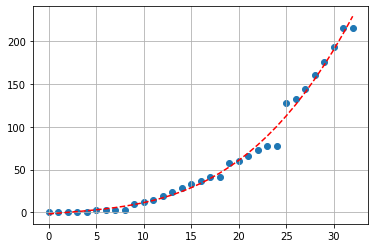

In [119]:
calculate_and_create_chart_for_province(START_DATE, 'Siena')

# Casi di COVID-19 in Provincia Autonoma di Trento - COVID-19 cases in the Autonomous Province of Trento

Total cases per 1000 inhabitants up to today: 2.5826
Total cases up to today: 1391
New cases registered today: 94
New cases registered today in %: 7.25
Doubling time in the last five days: 9.2
Doubling time yesterday: 6.8
Trend of new cases (in %) in the last 5 days: 45.81


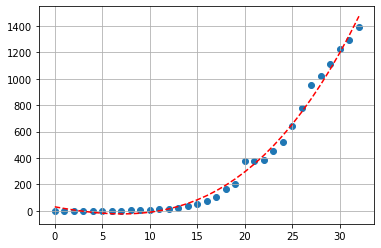

In [120]:
calculate_and_create_chart_for_province(START_DATE, 'Trento')

# Casi di COVID-19 in Umbria - COVID-19 cases in Umbria

Total cases up to today: 853
New cases registered today: 75
New cases registered today in %: 9.64
Doubling time in the last five days: 6.6
Doubling time yesterday: 6.2
Trend of new cases (in %) in the last 5 days: 69.25


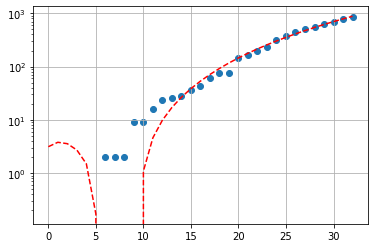

In [121]:
calculate_and_create_chart_for_region(START_DATE, 'Umbria')

## Perugia

Total cases per 1000 inhabitants up to today: 0.9959
Total cases up to today: 658
New cases registered today: 58
New cases registered today in %: 9.67
Doubling time in the last five days: 6.2
Doubling time yesterday: 5.8
Trend of new cases (in %) in the last 5 days: 75.0


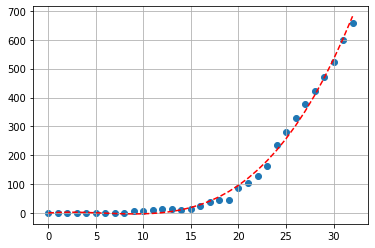

In [122]:
calculate_and_create_chart_for_province(START_DATE, 'Perugia')

## Terni

Total cases per 1000 inhabitants up to today: 0.8544
Total cases up to today: 195
New cases registered today: 17
New cases registered today in %: 9.55
Doubling time in the last five days: 8.2
Doubling time yesterday: 7.9
Trend of new cases (in %) in the last 5 days: 52.34


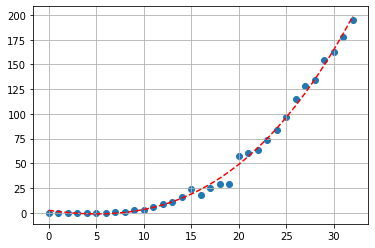

In [123]:
calculate_and_create_chart_for_province(START_DATE, 'Terni')

# Casi di COVID-19 in Valle d'Aosta - COVID-19 cases in Aosta Valley

Total cases per 1000 inhabitants up to today: 3.5623
Total cases up to today: 452
New cases registered today: 44
New cases registered today in %: 10.78
Doubling time in the last five days: 16.0
Doubling time yesterday: 13.1
Trend of new cases (in %) in the last 5 days: 24.18


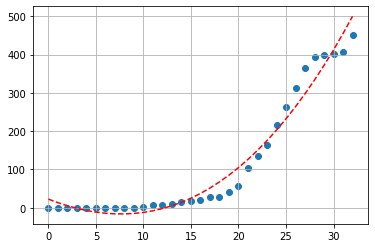

In [124]:
calculate_and_create_chart_for_province(START_DATE, "Aosta")

# Casi di COVID-19 in Veneto - COVID-19 cases in Veneto

Total cases up to today: 7218
New cases registered today: 543
New cases registered today in %: 8.13
Doubling time in the last five days: 9.1
Doubling time yesterday: 8.5
Trend of new cases (in %) in the last 5 days: 46.62


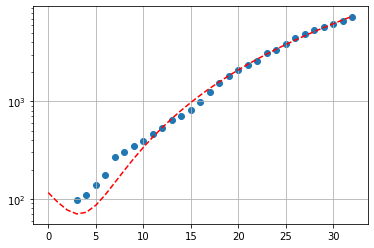

In [125]:
calculate_and_create_chart_for_region(START_DATE, 'Veneto')

## Belluno

Total cases per 1000 inhabitants up to today: 1.5988
Total cases up to today: 329
New cases registered today: 16
New cases registered today in %: 5.11
Doubling time in the last five days: 9.2
Doubling time yesterday: 8.9
Trend of new cases (in %) in the last 5 days: 45.58


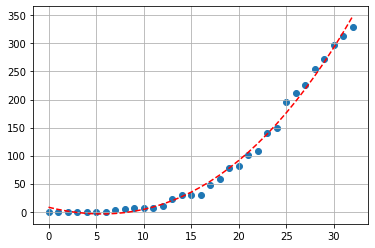

In [126]:
calculate_and_create_chart_for_province(START_DATE, 'Belluno')

## Padova

Total cases per 1000 inhabitants up to today: 2.0197
Total cases up to today: 1891
New cases registered today: 114
New cases registered today in %: 6.42
Doubling time in the last five days: 8.8
Doubling time yesterday: 8.0
Trend of new cases (in %) in the last 5 days: 48.08


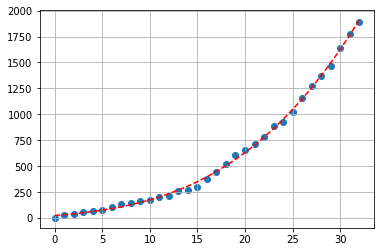

In [127]:
calculate_and_create_chart_for_province(START_DATE, 'Padova')

## Rovigo

Total cases per 1000 inhabitants up to today: 0.5113
Total cases up to today: 122
New cases registered today: 12
New cases registered today in %: 10.91
Doubling time in the last five days: 7.3
Doubling time yesterday: 7.2
Trend of new cases (in %) in the last 5 days: 60.53


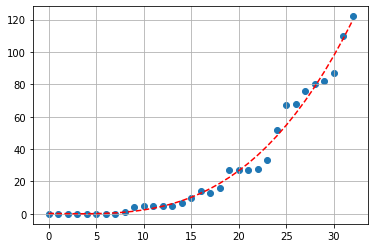

In [128]:
calculate_and_create_chart_for_province(START_DATE, 'Rovigo')

## Treviso

Total cases per 1000 inhabitants up to today: 1.4786
Total cases up to today: 1310
New cases registered today: 56
New cases registered today in %: 4.47
Doubling time in the last five days: 10.3
Doubling time yesterday: 7.8
Trend of new cases (in %) in the last 5 days: 40.11


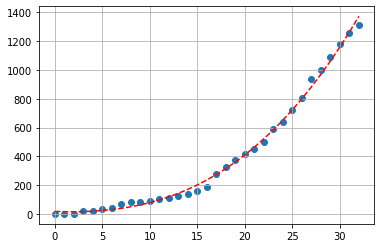

In [129]:
calculate_and_create_chart_for_province(START_DATE, 'Treviso')

## Venezia

Total cases per 1000 inhabitants up to today: 1.1179
Total cases up to today: 955
New cases registered today: 35
New cases registered today in %: 3.8
Doubling time in the last five days: 13.0
Doubling time yesterday: 10.7
Trend of new cases (in %) in the last 5 days: 30.46


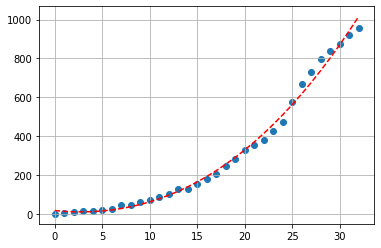

In [130]:
calculate_and_create_chart_for_province(START_DATE, 'Venezia')

## Verona

Total cases per 1000 inhabitants up to today: 1.785
Total cases up to today: 1645
New cases registered today: 243
New cases registered today in %: 17.33
Doubling time in the last five days: 7.7
Doubling time yesterday: 9.0
Trend of new cases (in %) in the last 5 days: 57.27


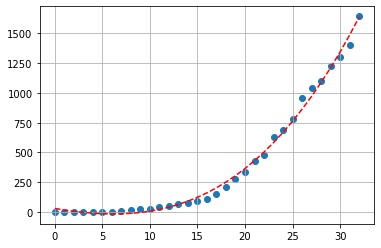

In [131]:
calculate_and_create_chart_for_province(START_DATE, 'Verona')

## Vicenza

Total cases per 1000 inhabitants up to today: 1.1167
Total cases up to today: 966
New cases registered today: 67
New cases registered today in %: 7.45
Doubling time in the last five days: 8.1
Doubling time yesterday: 7.7
Trend of new cases (in %) in the last 5 days: 53.09


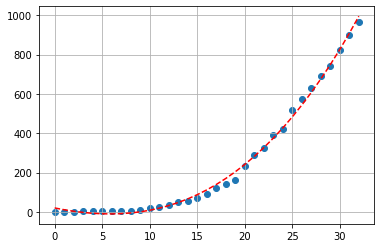

In [132]:
calculate_and_create_chart_for_province(START_DATE, 'Vicenza')